In [ ]:
# Time Series Analysis with p d and q

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
apdf = pd.read_csv('AirPassengers.csv', parse_dates= ['Month'], index_col= 'Month')

In [3]:
apdf

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# Test for seasonality

In [6]:
def stationary_checker(df,x):
    from statsmodels.tsa.stattools import adfuller
    
    # Rolling Statistics test
    rolling_mean = df.rolling(window = 12).mean()
    rolling_std =  df.rolling(window = 12).std()
    
    print('Rolling Statistics Test')
    
    original = plt.plot(df,color = 'blue', label = 'Original')
    rol_mean = plt.plot(rolling_mean, color = 'red', label = 'Rolling_mean')
    rol_std = plt.plot(rolling_std, color = 'green', label = 'Rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean and Rolling Std')
    plt.show()
    
    print('Argumented Dicky Fuller Test')
    # ADF Test
    result = adfuller(x, autolag='AIC')
    print('ADF Statistic:', result[0])
    print(f'p-value:', result[1])
    for key, value in result[4].items():
        print('Critial Values:')
        print( key, value)

Rolling Statistics Test


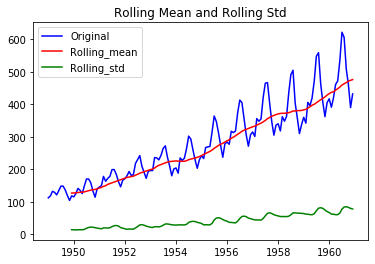

Argumented Dicky Fuller Test
ADF Statistic: 0.8153688792060423
p-value: 0.9918802434376409
Critial Values:
1% -3.4816817173418295
Critial Values:
5% -2.8840418343195267
Critial Values:
10% -2.578770059171598


In [7]:
import warnings
warnings.filterwarnings('ignore')
stationary_checker(apdf, apdf.iloc[:,0])

In [8]:
# The state of mean, variance, covariance staying a constant over time is called Sationary
# This can be affected by a couple of factors like Trend, Seasonality of the series
# Let's check what's causing that and nullify or subsidize the same

# Estimating & Eliminating Trend

In [9]:
# One way to eliminate the trend by normalizing it
apdf_logged = np.log(apdf)

Rolling Statistics Test


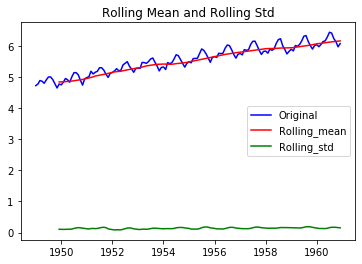

Argumented Dicky Fuller Test
ADF Statistic: -1.7170170891069714
p-value: 0.4223667747703857
Critial Values:
1% -3.4816817173418295
Critial Values:
5% -2.8840418343195267
Critial Values:
10% -2.578770059171598


In [10]:
stationary_checker(apdf_logged, apdf_logged.iloc[:,0])

In [63]:
# Diffenecing the log of the series by it's moving average
ts_log_moving_avg_diff = apdf_logged - apdf_logged.rolling(window= 12).mean()

In [66]:
ts_log_moving_avg_diff.dropna(inplace = True)

Rolling Statistics Test


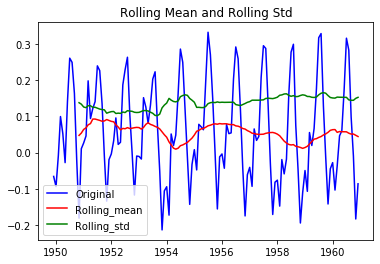

Argumented Dicky Fuller Test
ADF Statistic: -3.162907991300858
p-value: 0.022234630001243844
Critial Values:
1% -3.4865346059036564
Critial Values:
5% -2.8861509858476264
Critial Values:
10% -2.579896092790057


In [67]:
stationary_checker(ts_log_moving_avg_diff, ts_log_moving_avg_diff.iloc[:,0])

In [14]:
# We can see the logged sereis - rolling mean of the same gave us a mostly stationary series

# Eliminating the trend and seasonality

In [15]:
## Differencing way

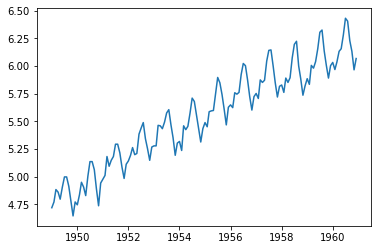

In [16]:
plt.plot(apdf_logged)
plt.show()

Rolling Statistics Test


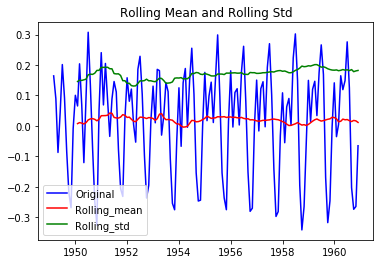

Argumented Dicky Fuller Test
ADF Statistic: -3.1679073752887454
p-value: 0.021919114564038708
Critial Values:
1% -3.4816817173418295
Critial Values:
5% -2.8840418343195267
Critial Values:
10% -2.578770059171598


In [68]:
stationary_checker(apdf_logged.diff(periods = 2).dropna(),apdf_logged.diff(periods = 2).dropna().iloc[:,0])

In [18]:
# Decomposing the wave

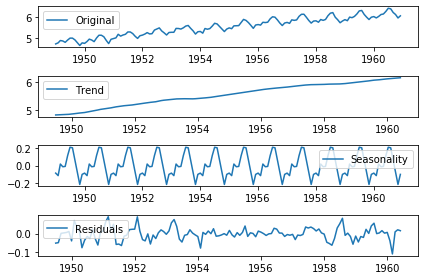

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(apdf_logged)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(apdf_logged, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


Rolling Statistics Test


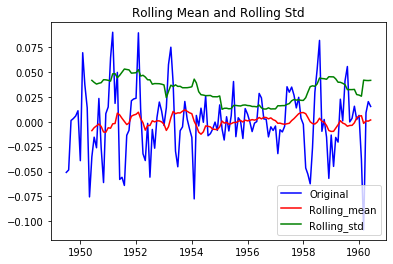

Argumented Dicky Fuller Test
ADF Statistic: -6.332386797644867
p-value: 2.8850589033233625e-08
Critial Values:
1% -3.4851223522012855
Critial Values:
5% -2.88553750045158
Critial Values:
10% -2.5795685622144586


In [20]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
stationary_checker(ts_log_decompose, ts_log_decompose.iloc[:,0])

In [21]:
# The residuals pass the dicky fuller test beacuse they are free from both seasons and the trend of the wave

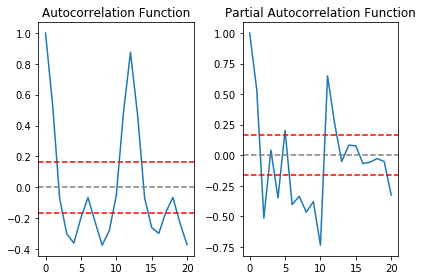

In [22]:
#ACF and PACF plots:
ts_log_diff = apdf_logged.diff(periods = 2).dropna()
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='red')
plt.title('Autocorrelation Function')
#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='red')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [23]:
p = 2
d = 2
q = 2

In [24]:
# Let's build an arima model

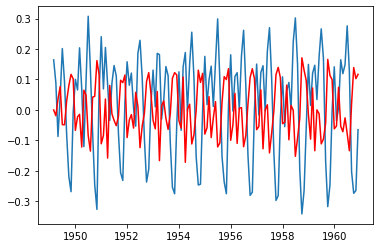

In [27]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(apdf_logged, order=(2, 2, 2))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.show()

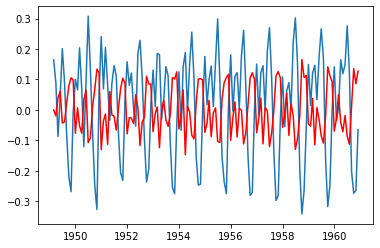

In [71]:
model = ARIMA(apdf_logged, order=(0, 2, 2))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.show()

In [72]:
# Predictions

In [32]:
apdf_logged.size

144

In [35]:
X = apdf_logged[:109] # Train
y = apdf_logged[109:] # Test

In [73]:
model_arima = ARIMA(X, order= (2,2,2))
model_arima_fit = model_arima.fit()

In [51]:
predictions = model_arima_fit.forecast(steps = 35)[0]

In [52]:
preds = pd.DataFrame(predictions, index = y.index)

In [74]:
np.sqrt(mean_squared_error(predictions, y))

0.26947185314858946

In [75]:
model_arima_fit.aic

-174.06031553084864